In [5]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 2.9MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [15]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two


Wczytywanie danych

In [17]:
df = pd.read_hdf('data/car.h5');
df.shape

(106494, 155)

In [18]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model

In [19]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [22]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X, y)
y_pred = model.predict(X)
mae(y, y_pred)


39465.934630440985

In [23]:
[x for x in df.columns if 'price' in x] 

['price_currency', 'price_details', 'price_value']

In [24]:
df['price_currency'].value_counts(normalize=True)

PLN    0.998084
EUR    0.001916
Name: price_currency, dtype: float64

In [25]:
df = df[ df['price_currency'] != 'EUR']
df.shape

(106290, 155)

Features

In [40]:
df['param_color'].factorize()[0].min()

-1

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list):
    continue
  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT] = factorized_values

In [0]:
np.mean(scores)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs = [np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return (
  df
    .groupby(feat_groupby )[feat_agg]
    .agg(agg_funcs) # np.mean
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots)

In [48]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x and 'price' not in x]
len(cat_feats) 

151

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')


In [54]:
np.mean(scores)

-19650.45289201444

In [56]:
model2 = DecisionTreeRegressor(max_depth=5)
model2.fit(X,y)

imp = PermutationImportance(model2, random_state=0).fit(X, y)
eli5.show_weights(model2, feature_names=cat_feats)

Weight,Feature
0.3560,param_faktura-vat__cat
0.2775,param_napęd__cat
0.0857,param_rok-produkcji__cat
0.0664,feature_kamera-cofania__cat
0.0524,param_moc__cat
0.0489,param_stan__cat
0.0439,param_skrzynia-biegów__cat
0.0190,feature_łopatki-zmiany-biegów__cat
0.0181,param_pojemność-skokowa__cat
0.0168,feature_bluetooth__cat


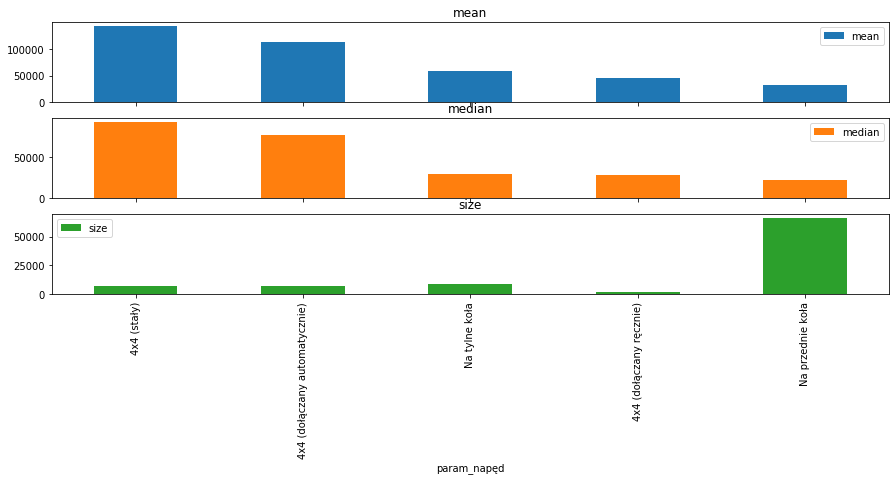

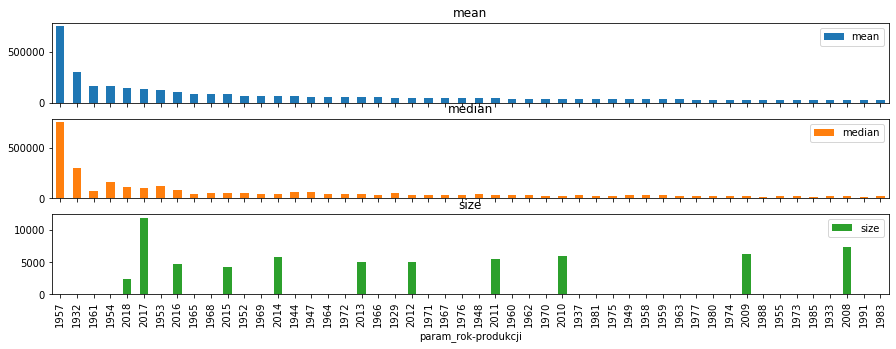

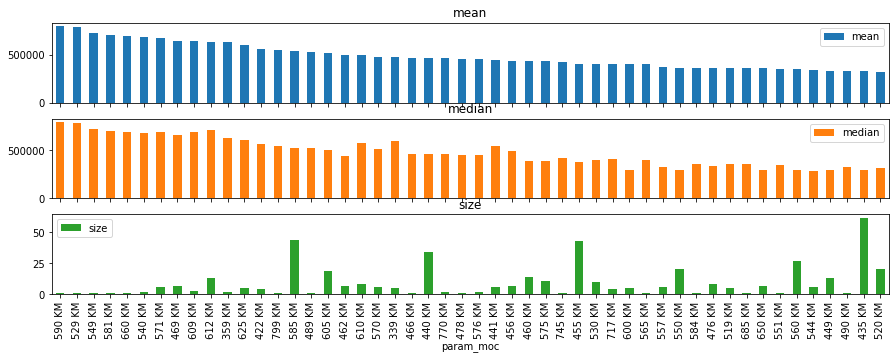

In [61]:
group_and_barplot('param_napęd');
group_and_barplot('param_rok-produkcji');
group_and_barplot('param_moc');